# **Proyek Akhir : Klasifikasi Gambar**




**Nama : Idha Kurniawati**

**Email : idhakurniawati03@gmail.com**

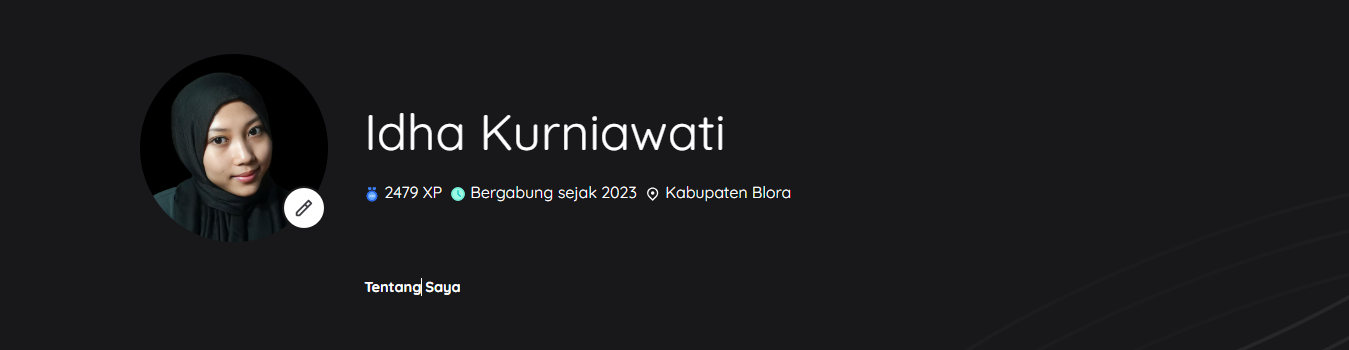

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
base_dir = '/content/drive/My Drive/Dicoding_Klasifikasi_Gambar/'
!ls "/content/drive/My Drive/Dicoding_Klasifikasi_Gambar/"

Datasets  Train  Validation


In [ ]:
# Menentukan directory

Datasets_dir = os.path.join(base_dir, 'Datasets')
Train_dir = os.path.join(base_dir, 'Train')
Validation_dir = os.path.join(base_dir, 'Validation')

In [ ]:
# Menentukan directory Datasets

rock_dir = os.path.join(Datasets_dir,'rock/')
paper_dir = os.path.join(Datasets_dir,'paper/')
scissors_dir = os.path.join(Datasets_dir,'scissors/')

print("Jumlah gambar batu pada Datasets: ", len(os.listdir(rock_dir)))
print("Jumlah gambar kertas pada Datasets: ", len(os.listdir(paper_dir)))
print("Jumlah gambar gunting pada Datasets: ", len(os.listdir(scissors_dir)))

Jumlah gambar batu pada Datasets:  726
Jumlah gambar kertas pada Datasets:  712
Jumlah gambar gunting pada Datasets:  750


In [ ]:
# Menentukan Training
train_rock = os.path.join(Train_dir, 'rock/')
train_paper = os.path.join(Train_dir, 'paper/')
train_scissors = os.path.join(Train_dir, 'scissors/')

# Menetukan Validasi
validation_rock = os.path.join(Validation_dir, 'rock/')
validation_paper = os.path.join(Validation_dir, 'paper/')
validation_scissors = os.path.join(Validation_dir, 'scissors/')

In [ ]:
# Menyiapkan dataset

import random
from shutil import copyfile

def train_val_split(source, train, validation, train_ratio, validation_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  validation_size = int(validation_ratio * total_size)

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  validation_files = randomized[0:validation_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in validation_files:
    i_file = source + i
    destination = validation + i
    copyfile(i_file, destination)

# Rasio training dan validation
train_ratio = 0.6
validation_ratio = 0.4


# Pembagian training dan validation
  # training dan validation batu
source_rock = rock_dir
train_val_split(source_rock, train_rock, validation_rock, train_ratio, validation_ratio)

  # training dan validation kertas
source_paper = paper_dir
train_val_split(source_paper, train_paper, validation_paper, train_ratio, validation_ratio)

  # training dan validation gunting
source_scissors = scissors_dir
train_val_split(source_scissors, train_scissors, validation_scissors, train_ratio, validation_ratio)

In [ ]:
# Melihat jumlah gambar setelah dibagi ke training dan validation
print('Jumlah Datasets batu         :', len(os.listdir(rock_dir)))
print('Jumlah training batu         :', len(os.listdir(train_rock)))
print('Jumlah validatin batu        :', len(os.listdir(validation_rock)))

print('\nJumlah Datasets kertas       :', len(os.listdir(paper_dir)))
print('Jumlah training kertas       :', len(os.listdir(train_paper)))
print('Jumlah validatin kertas      :', len(os.listdir(validation_paper)))

print('\nJumlah Datasets gunting      :', len(os.listdir(scissors_dir)))
print('Jumlah training gunting      :', len(os.listdir(train_scissors)))
print('Jumlah validatin gunting     :', len(os.listdir(validation_scissors)))

print('\n\nTotal dataset training       :', len(os.listdir(train_rock))+len(os.listdir(train_paper))+len(os.listdir(train_scissors)))
print('Total dataset validation     :', len(os.listdir(validation_rock))+len(os.listdir(validation_paper))+len(os.listdir(validation_scissors)))

Jumlah Datasets batu         : 726
Jumlah training batu         : 435
Jumlah validatin batu        : 290

Jumlah Datasets kertas       : 712
Jumlah training kertas       : 427
Jumlah validatin kertas      : 284

Jumlah Datasets gunting      : 750
Jumlah training gunting      : 450
Jumlah validatin gunting     : 300


Total dataset training       : 1312
Total dataset validation     : 874


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow_from_directory(Train_dir,
                                                    batch_size=4,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(Validation_dir,
                                                              batch_size=4,
                                                              class_mode = 'categorical',
                                                              target_size = (150, 150))

Found 1312 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Membuat model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
    )

In [ ]:
model.fit(train_generator,
          epochs=30,
          steps_per_epoch = 25,
          verbose=2,
          validation_data=validation_generator,
          validation_steps = 5,
    )

Epoch 1/30
25/25 - 5s - loss: 0.3243 - accuracy: 0.8500 - val_loss: 0.1650 - val_accuracy: 0.9500 - 5s/epoch - 188ms/step
Epoch 2/30
25/25 - 6s - loss: 0.2618 - accuracy: 0.9300 - val_loss: 0.3748 - val_accuracy: 0.8000 - 6s/epoch - 248ms/step
Epoch 3/30
25/25 - 7s - loss: 0.2606 - accuracy: 0.8900 - val_loss: 0.3783 - val_accuracy: 0.8000 - 7s/epoch - 264ms/step
Epoch 4/30
25/25 - 5s - loss: 0.2104 - accuracy: 0.9300 - val_loss: 0.1550 - val_accuracy: 0.9500 - 5s/epoch - 191ms/step
Epoch 5/30
25/25 - 7s - loss: 0.3095 - accuracy: 0.8900 - val_loss: 0.2660 - val_accuracy: 0.9500 - 7s/epoch - 263ms/step
Epoch 6/30
25/25 - 6s - loss: 0.3402 - accuracy: 0.9000 - val_loss: 0.4454 - val_accuracy: 0.8000 - 6s/epoch - 245ms/step
Epoch 7/30
25/25 - 5s - loss: 0.2613 - accuracy: 0.9200 - val_loss: 0.4134 - val_accuracy: 0.8500 - 5s/epoch - 208ms/step
Epoch 8/30
25/25 - 5s - loss: 0.4789 - accuracy: 0.8300 - val_loss: 0.3324 - val_accuracy: 0.9000 - 5s/epoch - 187ms/step
Epoch 9/30
25/25 - 6s - 

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 64)       

Saving 1WX9KKoq0nkWiTxI.png to 1WX9KKoq0nkWiTxI.png
1/1 [==============================] - 0s 32ms/step
[[0. 0. 1.]]
1WX9KKoq0nkWiTxI.png
Scissors


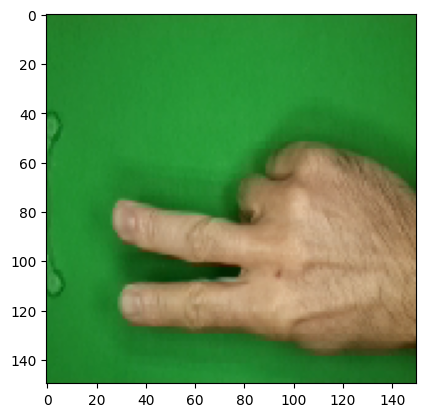

In [ ]:
# Membuat fungsi untuk mencoba klasifikasi gambar
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')
  else:
    print('Unknown')
